<h3>First we import the required libraries
    

In [1]:
import tensorflow as tf
from tensorflow import keras #keras is an API for the tensorflow backend
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<h3>Now we load the popular mnist data set available in keras</h3>

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

<h5>checking the dimensions of the dataset</h5>

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

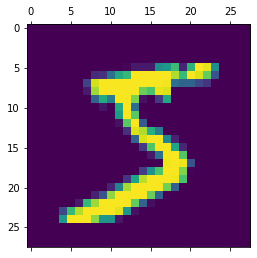

In [7]:
plt.matshow(X_train[0])

In [8]:
#as we can see the image is represented as a 28*28 matrix containing values ranging from 0 to 255

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
#flatenning the dataset so that it can be feeded to a neural net

In [11]:
X_train=X_train.reshape(60000,(28*28))

In [12]:
X_train.shape

(60000, 784)

In [13]:
X_test=X_test.reshape(len(X_test),(28*28))

In [14]:
X_test.shape

(10000, 784)

In [15]:
#now for each image we have a list of 784 integers 

In [16]:
#scaling the lists so that each integer falls in the range (0,1]

In [17]:
X_train=X_train/255

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
X_test=X_test/255

<h3>The data has now been prepared to be fed into the neural network</h3>

In [20]:
#using 2 hidden layers
Classifier=keras.Sequential([
    keras.layers.Dense(300,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])



Classifier.compile(
    optimizer = 'adam' ,#best for training the neural net accurately in less time
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [21]:
Classifier.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 956us/step - loss: 0.1988 - accuracy: 0.9410
Epoch 2/20
1875/1875 [==============================] - 2s 934us/step - loss: 0.0836 - accuracy: 0.9739
Epoch 3/20
1875/1875 [==============================] - 2s 933us/step - loss: 0.0556 - accuracy: 0.9819
Epoch 4/20
1875/1875 [==============================] - 2s 922us/step - loss: 0.0410 - accuracy: 0.9866
Epoch 5/20
1875/1875 [==============================] - 2s 926us/step - loss: 0.0333 - accuracy: 0.9889
Epoch 6/20
1875/1875 [==============================] - 2s 931us/step - loss: 0.0273 - accuracy: 0.9911
Epoch 7/20
1875/1875 [==============================] - 2s 927us/step - loss: 0.0243 - accuracy: 0.9921
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0206 - accuracy: 0.9933
Epoch 9/20
1875/1875 [==============================] - 2s 978us/step - loss: 0.0166 - accuracy: 0.9942
Epoch 10/20
1875/1875 [==============================] - 2s 924us/

In [22]:

Classifier.evaluate(X_test,y_test)

313/313 [==============================] - 0s 634us/step - loss: 0.1178 - accuracy: 0.9804


[0.11777565628290176, 0.980400025844574]

<h3>Evaluating the model</h3>

In [23]:
y_predicted = Classifier.predict(X_test)


In [24]:
y_predicted.shape


(10000, 10)

In [25]:
y_predicted[0]

array([3.6461689e-10, 3.2465583e-01, 1.2146646e-01, 5.8372268e-07,
       3.4363932e-08, 4.1704540e-10, 6.3142145e-16, 1.0000000e+00,
       7.8496164e-08, 7.7897847e-02], dtype=float32)

In [26]:
#value at index i represents the output of the ith neuron 
#index with highest value is taken to be predicted value for the entered matrix
#converting the predicted list into a form useful to evaluate its performance
y_predicted_converted =[]
for i in y_predicted:
    y_predicted_converted.append(np.argmax(i))

In [27]:
y_predicted_converted[:7]

[7, 2, 1, 0, 4, 1, 4]

In [28]:
from tensorflow.math import confusion_matrix
cm = confusion_matrix(labels = y_test, predictions = y_predicted_converted)


In [29]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    3,    1,    0,    2,    2,    2,    1,    0],
       [   0, 1129,    1,    0,    0,    0,    3,    1,    1,    0],
       [   2,    8, 1005,    2,    1,    0,    4,    5,    4,    1],
       [   0,    0,    3,  986,    0,    4,    0,    7,    4,    6],
       [   0,    0,    4,    1,  965,    0,    2,    3,    1,    6],
       [   1,    0,    0,   35,    1,  840,    4,    1,    7,    3],
       [   4,    2,    0,    1,    7,   22,  920,    0,    2,    0],
       [   0,    3,   12,    0,    0,    0,    0, 1006,    1,    6],
       [   1,    1,    2,    6,    2,    3,    2,    2,  953,    2],
       [   3,    2,    0,    2,    8,    6,    0,    8,    6,  974]])>

In [30]:
#entry[i][j] represents number of times ith digit was predicted as jth digit

<h3>Calculating precision,recall and f-score</h3>

In [31]:
from sklearn.metrics import precision_recall_fscore_support

In [32]:
precision_recall_fscore_support(y_test,y_predicted_converted,average = 'weighted')

(0.9746339204333399, 0.9746, 0.9745781835626381, None)

<h3>project is hereby concluded</h3>
<p><strong>Accuracy - 0.9804</strong></p>
<p><strong>precision-0.975</strong></p>
<p> <strong>recall-0.975</strong></p>
<p> <strong>fscore-0.9745</strong></p>   